In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_whole = pd.read_csv('data.csv')
data_whole.head(5)

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349951,0.130192,1784.416546,2002.657106,3806.418650,0.083066,-113.619385,121.553017,-19.151056,...,8.806787,-3.665802,5.745939,-5.161712,0.750298,-1.688358,-0.409329,-2.298869,1.219947,blues
1,blues.00001.wav,0.340945,0.095892,1529.871314,2038.612143,3548.986873,0.056044,-207.581512,123.997147,8.939115,...,5.375942,-2.237833,4.217125,-6.011047,0.932668,-0.717028,0.292333,-0.285717,0.532144,blues
2,blues.00002.wav,0.363562,0.175494,1552.637786,1747.382028,3041.089944,0.076301,-90.776344,140.448608,-29.100559,...,5.785763,-8.899733,-1.087024,-9.216774,2.453648,-7.721793,-1.816497,-3.434354,-2.231391,blues
3,blues.00003.wav,0.404848,0.141139,1070.110059,1596.244204,2185.061787,0.033309,-199.462006,150.094727,5.649167,...,6.085354,-2.476188,-1.076225,-2.876056,0.776909,-3.320055,0.637263,-0.617507,-3.406940,blues
4,blues.00004.wav,0.308598,0.091540,1835.507009,1748.367477,3581.003346,0.101500,-160.291855,126.195763,-35.602501,...,-2.809849,-6.935621,-7.559294,-9.172152,-4.510408,-5.453736,-0.924468,-4.408076,-11.701833,blues


In [3]:
label_df = data_whole.groupby(data_whole['label']).count()

In [4]:
label_df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
label,,,,,,,,,,,,,,,,,,,,,
blues,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
classical,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
country,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
disco,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
hiphop,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
jazz,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
metal,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
pop,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
reggae,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [21]:
chroma_stft_df = data_whole.loc[(data_whole['label'] == 'jazz') | (data_whole['label'] == 'blues')][['label','chroma_stft']]

In [22]:
chroma_stft_df

,label,chroma_stft
0,blues,0.349951
1,blues,0.340945
2,blues,0.363562
3,blues,0.404848
4,blues,0.308598
...,...,...
594,jazz,0.311281
595,jazz,0.298659
596,jazz,0.224045
597,jazz,0.327903


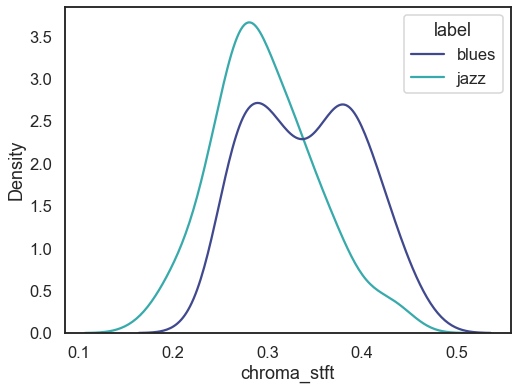

In [23]:
sns.set_style(style='white')
sns.set_context('talk')
g = sns.kdeplot(x = "chroma_stft", hue='label', palette='mako', data=chroma_stft_df)
g.figure.set_size_inches(8, 6)

In [27]:
spectral_df = data_whole.loc[(data_whole['label'] == 'jazz') | (data_whole['label'] == 'blues') | (data_whole['label'] == 'classical')][['label', 'spectral_centroid', 'spectral_bandwidth']]

In [28]:
spectral_df

,label,spectral_centroid,spectral_bandwidth
0,blues,1784.416546,2002.657106
1,blues,1529.871314,2038.612143
2,blues,1552.637786,1747.382028
3,blues,1070.110059,1596.244204
4,blues,1835.507009,1748.367477
...,...,...,...
594,jazz,1855.285649,2215.888359
595,jazz,1874.628040,2084.021022
596,jazz,1176.004362,1752.937088
597,jazz,1884.943901,2230.243952


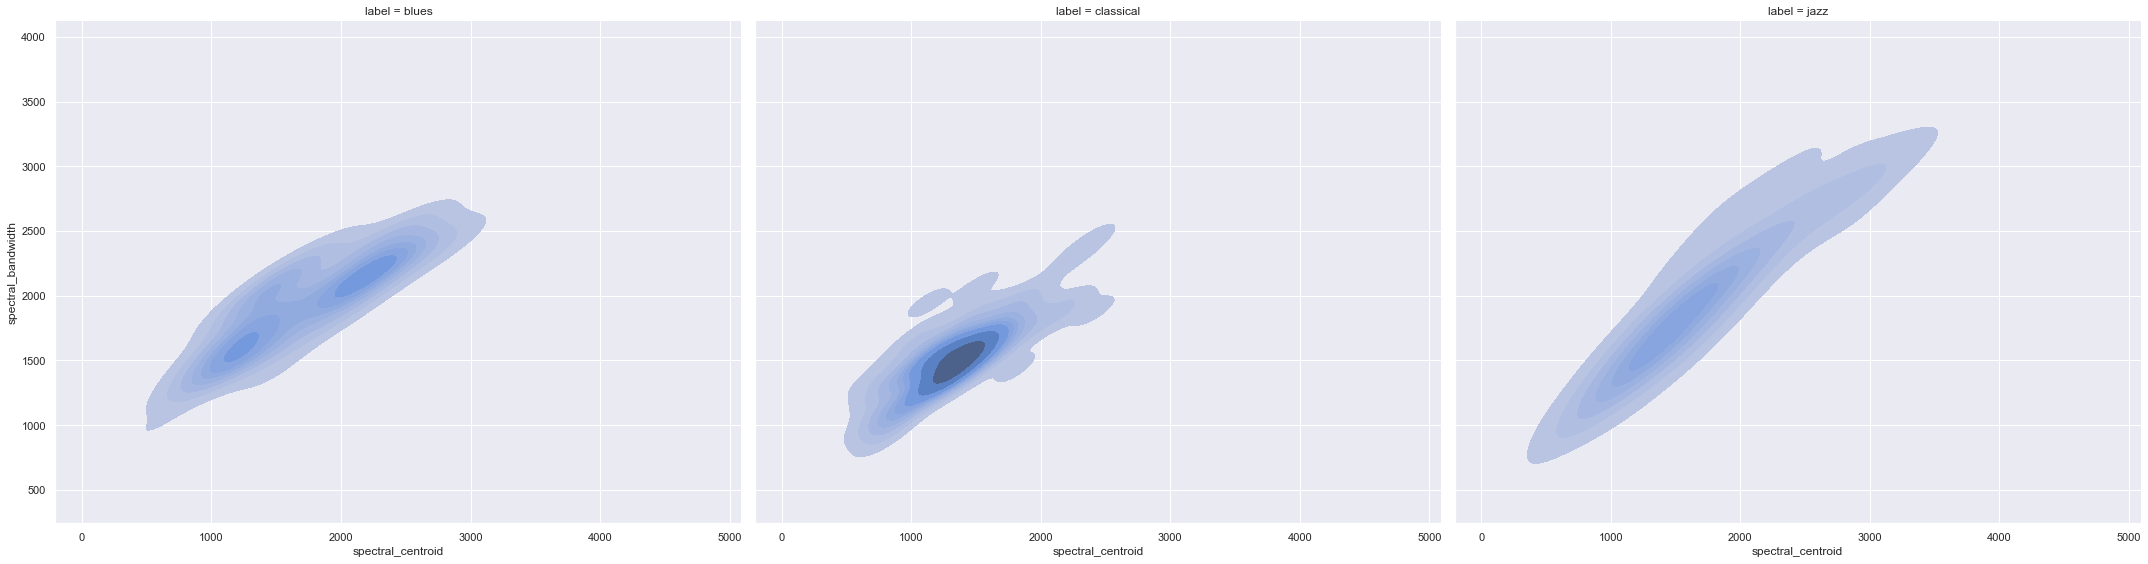

In [56]:
sns.set_theme('notebook')
k = sns.displot(spectral_df, x='spectral_centroid', y='spectral_bandwidth', col='label',kind='kde',fill = True, height=8, aspect=1.25, palette='magma')